# HW 2: SVD and PCA for Machine Learning

## Visualizing dyads

In [1]:
import skimage
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

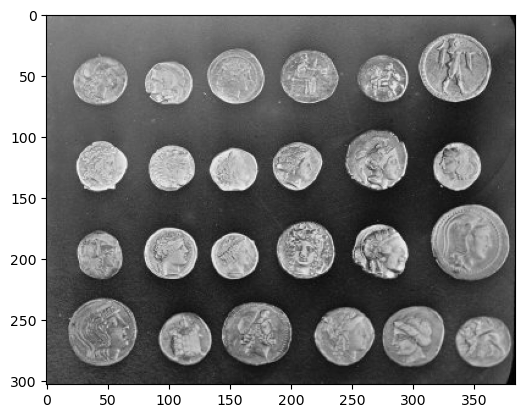

Shape of the image: (303, 384)


In [2]:
X = skimage.data.coins()  # Loading image

plt.imshow(X, cmap="gray")
plt.show()

print(f"Shape of the image: {X.shape}")

In [3]:
# SVD decomposition of X
U, s, VT = np.linalg.svd(X)

In [4]:
# Visualizing dyads
for i in [0, 1, 2, 300, 301, 302]:
    u_i = U[:, 0]

    v_i = VT[0, :]  # Row of VT is column of V

    A_i = s[i] * np.outer(
        u_i, v_i
    )  # np.outer is equivalent to u @ v^T, removes need for np.newaxis and transposition
    print(f"Dyad number {i}")
    print(A_i)
    print("\n")

Dyad number 0
[[106.90360295 106.21966312 104.98915141 ...  74.51483184  71.12220327
   59.07919252]
 [106.53471975 105.85313994 104.62687425 ...  74.25770983  70.87678792
   58.87533296]
 [105.80091844 105.12403329 103.90621401 ...  73.74622958  70.38859515
   58.4698051 ]
 ...
 [ 44.23805033  43.95502746  43.44582629 ...  30.83517103  29.43125882
   24.44771008]
 [ 44.54486872  44.25988291  43.74715012 ...  31.04903212  29.63538291
   24.61727016]
 [ 44.56415412  44.27904492  43.76609015 ...  31.06247459  29.64821335
   24.62792804]]


Dyad number 1
[[21.16375746 21.02835756 20.78475257 ... 14.75173693 14.08009663
  11.69593603]
 [21.09072947 20.95579679 20.71303239 ... 14.70083437 14.03151164
  11.65557785]
 [20.94545848 20.8114552  20.57036293 ... 14.59957638 13.93486388
  11.57529531]
 ...
 [ 8.757828    8.70179783  8.60099103 ...  6.10445357  5.8265204
   4.83992487]
 [ 8.81856899  8.76215021  8.66064425 ...  6.14679175  5.86693094
   4.87349276]
 [ 8.82238693  8.76594372  8.6643

Since each dyad is scaled by its corresponding singular value, the magnitudes of successive dyads decreases, reflecting the singular values' descending order.

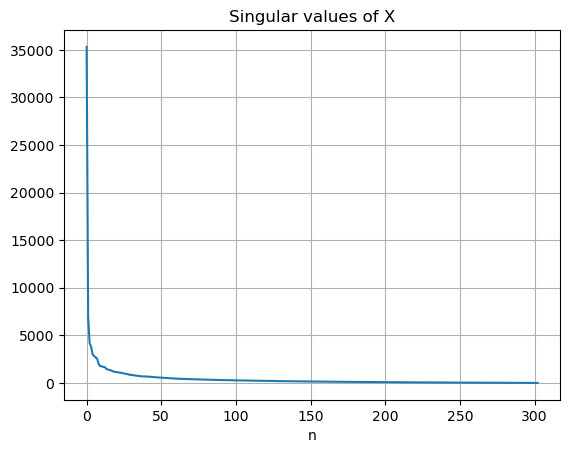

In [5]:
# Plotting singular values
plt.plot(s)
plt.title("Singular values of X")
plt.xlabel("n")
plt.grid()

plt.show()

As previously mentioned the singular values are in a decreasing order. The plot shows an exponential decrease in magnitude

In [6]:
# Computing all dyads
dyads = []
for i in range(len(s)):
    u = U[:, i]
    v = VT[i, :]  # Row of VT is column of V
    dyad = s[i] * np.outer(u, v)
    dyads.append(dyad)  # Storing dyad

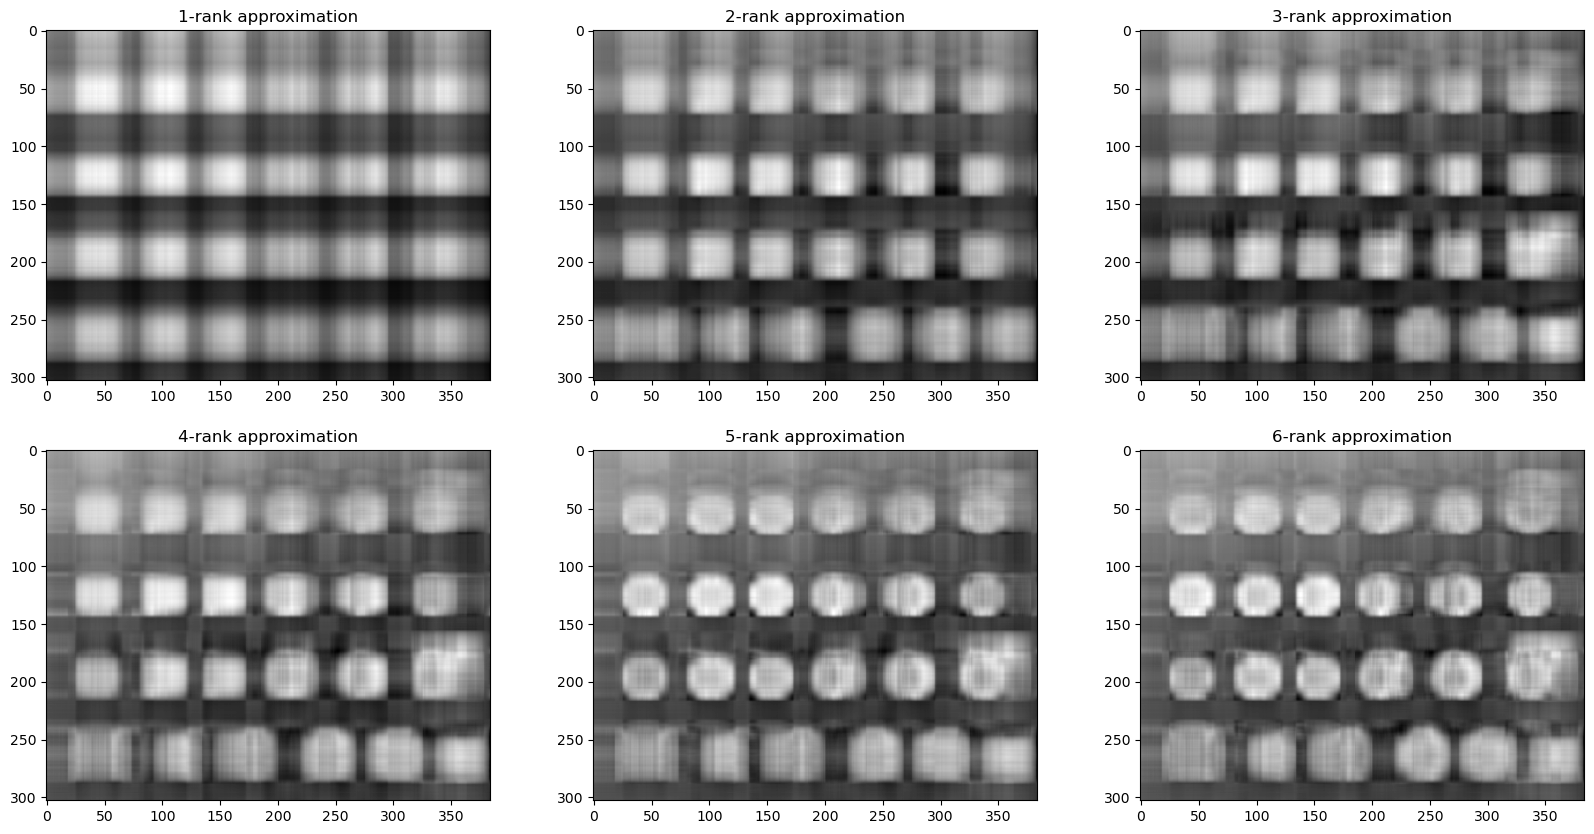

In [7]:
# Visualizing the k-rank approximation for k=1..6
plt.figure(figsize=(20, 10))

A_k = np.zeros(X.shape)  # Approximation of X
for k in range(6):
    A_k += dyads[k]  # (k+1)-approximation

    plt.subplot(2, 3, k + 1)
    plt.imshow(A_k, cmap="gray")
    plt.title(f"{k+1}-rank approximation")

plt.show()

As k increases, the shapes of the coins become clearer and more defined. This is because higher k-rank approximations retain more singular values and their corresponding dyads, reducing information loss and improving the image quality.

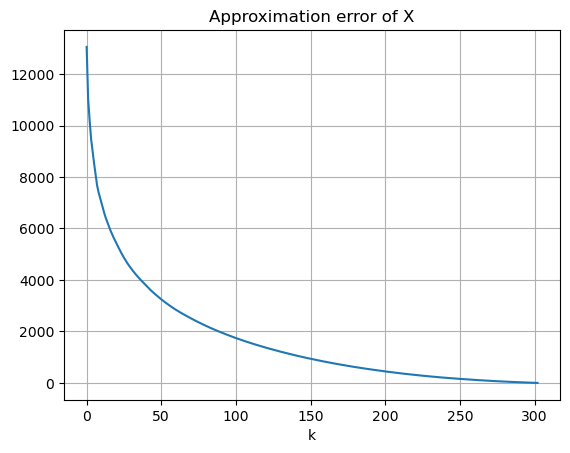

In [8]:
# Computing and plotting approximation error
X_k = np.zeros(X.shape)  # k-rank approximation
app_error = []  # Stores approximation errors
for k in range(len(dyads)):
    X_k += dyads[k]
    app_error.append(np.linalg.norm(X - X_k, "fro"))

plt.plot(app_error)
plt.xlabel("k")
plt.title("Approximation error of X")
plt.grid()

plt.show()

The error decreases rapidly at first for small values of k, but the rate of decay slows down as k becomes larger. This shows that most of the critical information in X is captured by the first few singular values and corresponding dyads.  
For k = 302, the k-rank approximation is the original image hence the error is 0. (It's not exactly 0 because the k-rank approximation is not exactly the original image due to finite precision)

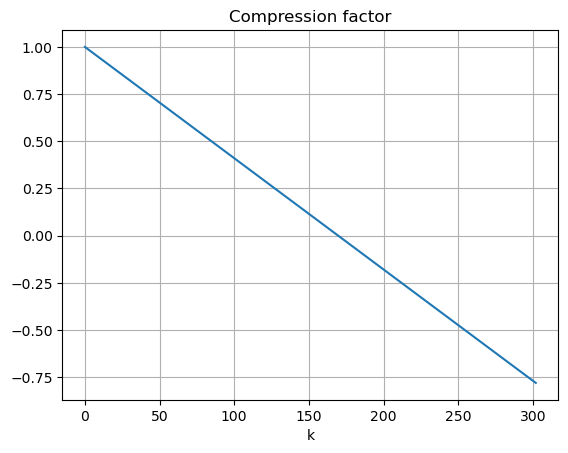

In [9]:
# Plotting compression factor
m = X.shape[0]  # 303
n = X.shape[1]  # 384
c = np.zeros(len(s))  # Compression factor for each k

for k in range(len(s)):
    c[k] = 1 - (k * (m + n - 1)) / (m * n)

plt.plot(c)
plt.title("Compression factor")
plt.xlabel("k")
plt.grid()

plt.show()

In [10]:
0 in c

False

The solution to the equation $1-\frac{k(m+n+1)}{mn} = 0$ for $m=303, n=384$ is $k=169.1162791$, but k must be an integer, so the tipping point value is k = 170.

In [11]:
X_k = np.zeros(X.shape)
for k in range(169):
    X_k += dyads[k]

abs_error = np.linalg.norm(X - X_k, "fro")
rel_error = abs_error / np.linalg.norm(X, "fro")
print(f"For the 169-rank approximation: the absolute error is {abs_error} while the relative error is {rel_error}")

For the 169-rank approximation: the absolute error is 733.1189009399833 while the relative error is 0.01947657510773265


For $k \geq 170$, i.e. values of k such that $c_k < 0$, the image is still not perfectly reconstructed and more memory is required than storing the original image X. Thus, approximations beyond this threshold are not effective (they provide no advantage). If a very small error is required, smaller than the error for k = 169, it is better to use the original image. 

## Classification of MNIST Digits with SVD Decomposition

### Classification of digits 3 and 4

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv("./data/mnist_digits.csv")

print(f"DataFrame shape: {df.shape}")
print(df.head())

DataFrame shape: (42000, 785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  


In [14]:
# Preprocessing
data = np.array(df)

X = data[:, 1:]  # Skipping target column
X = X.T

Y = data[:, 0]  # target column

print(X.shape, Y.shape)
d, N = X.shape

(784, 42000) (42000,)


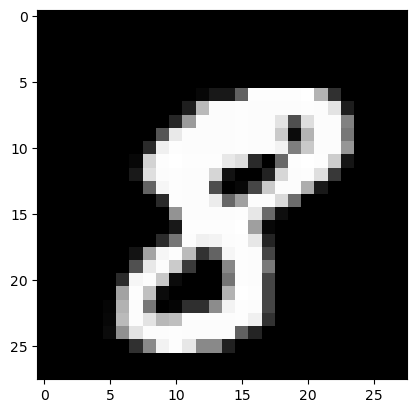

The associated digit is: 8


In [15]:
def visualize(X, idx):
    # Visualize the image of index 'idx' from the dataset 'X'

    # Select image
    img = X[:, idx]

    img = np.reshape(img, (28, 28))

    # Visualize
    plt.imshow(img, cmap="gray")
    plt.show()


# Visualize image number 10 and the corresponding digit.
idx = 10
visualize(X, idx)
print(f"The associated digit is: {Y[idx]}")

In [16]:
# Filtering: keeping elements corresponding to 3 or 4
filter_3or4 = (Y == 3) | (Y == 4)

X_3or4 = X[:, filter_3or4]
Y_3or4 = Y[filter_3or4]

In [17]:
def split_data(X, Y, train_size):
    _, N = X.shape
    N_train = int(train_size * N)

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:N_train]
    test_idx = idx[N_train:]

    X_train = X[:, train_idx]
    Y_train = Y[train_idx]

    X_test = X[:, test_idx]
    Y_test = Y[test_idx]

    return X_train, X_test, Y_train, Y_test


X_train, X_test, y_train, y_test = split_data(
    X_3or4, Y_3or4, train_size=0.8
)  # 80 : 20 train-test split

print(X_train.shape, X_test.shape)

(784, 6738) (784, 1685)


In [18]:
filter_3 = y_train == 3
filter_4 = y_train == 4

X1 = X_train[:, filter_3]  # Submatrix corresponding to 3
X2 = X_train[:, filter_4]  # Submatrix corresponding to 4

print(X1.shape, X2.shape)

(784, 3494) (784, 3244)


In [19]:
U1, s1, V1T = np.linalg.svd(X1, full_matrices=False)
U2, s2, V2T = np.linalg.svd(X2, full_matrices=False)

In [20]:
digit_idx = 0
x = X_test[:, digit_idx]  # picking unknown digit
print(x.shape)

(784,)


In [21]:
# Computing projections
x_proj1 = U1 @ (U1.T @ x)
x_proj2 = U2 @ (U2.T @ x)

In [22]:
d1 = np.linalg.norm(x - x_proj1, 2)
d2 = np.linalg.norm(x - x_proj2, 2)

if d1 < d2:
    print("x classified to C1")
elif d2 < d1:
    print("x classified to C2")
else:
    print("x equally distant from C1 and C2")
print(f"Real class of x: {y_test[digit_idx]}")

x classified to C2
Real class of x: 4


In [23]:
import random

random.seed(0)

In [24]:
# Predictions on test set
y_pred = np.zeros(len(y_test))  # Stores predictions
for i in range(len(y_test)):
    x = X_test[:, i]

    # Computing projections
    x_proj1 = U1 @ (U1.T @ x)
    x_proj2 = U2 @ (U2.T @ x)

    d1 = np.linalg.norm(x - x_proj1, 2)
    d2 = np.linalg.norm(x - x_proj2, 2)

    if d1 < d2:
        y_pred[i] = 3
    elif d2 < d1:
        y_pred[i] = 4
    else:
        y_pred[i] = random.choice(
            [3, 4]
        )  # If distances are the same I'm picking a class at random

# Misclassification rate
misclassifications = 0
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        misclassifications += 1

mr = misclassifications / len(y_test)
print(f"Misclassification rate on test set: {mr}")

Misclassification rate on test set: 0.03857566765578635


### Classification of digits 5 and 6

In [25]:
# Filtering: keeping elements corresponding to 5 or 6
filter_5or6 = (Y == 5) | (Y == 6)

X_5or6 = X[:, filter_5or6]
Y_5or6 = Y[filter_5or6]

X_train, X_test, y_train, y_test = split_data(
    X_5or6, Y_5or6, train_size=0.8
)  # 80 : 20 train-test split

print(X_train.shape, X_test.shape)

(784, 6345) (784, 1587)


In [26]:
filter_5 = y_train == 5
filter_6 = y_train == 6

X1 = X_train[:, filter_5]  # Submatrix corresponding to 5
X2 = X_train[:, filter_6]  # Submatrix corresponding to 6

print(X1.shape, X2.shape)

(784, 3048) (784, 3297)


In [27]:
U1, s1, V1T = np.linalg.svd(X1, full_matrices=False)
U2, s2, V2T = np.linalg.svd(X2, full_matrices=False)

In [28]:
# Predictions on test set
y_pred = np.zeros(len(y_test))  # Stores predictions
for i in range(len(y_test)):
    x = X_test[:, i]

    # Computing projections
    x_proj1 = U1 @ (U1.T @ x)
    x_proj2 = U2 @ (U2.T @ x)

    d1 = np.linalg.norm(x - x_proj1, 2)
    d2 = np.linalg.norm(x - x_proj2, 2)

    if d1 < d2:
        y_pred[i] = 5
    elif d2 < d1:
        y_pred[i] = 6
    else:
        y_pred[i] = random.choice(
            [5, 6]
        )  # If distances are the same I'm picking a class at random

# Misclassification rate
misclassifications = 0
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        misclassifications += 1

mr = misclassifications / len(y_test)
print(f"Misclassification rate on test set: {mr}")

Misclassification rate on test set: 0.13169502205419029


Visually similar digits, such as 5 and 6, are harder to classify correctly; hence, the misclassification rate for these digits is higher compared to 3 and 4.

### Classification of 3 digits: 3, 4, 8

In [29]:
# Filtering: keeping elements corresponding to 3,4 and 8
filter_3or4or8 = (Y == 3) | (Y == 4) | (Y == 8)

X_3or4or8 = X[:, filter_3or4or8]
Y_3or4or8 = Y[filter_3or4or8]

X_train, X_test, y_train, y_test = split_data(
    X_3or4or8, Y_3or4or8, train_size=0.8
)  # 80 : 20 train-test split

print(X_train.shape, X_test.shape)

(784, 9988) (784, 2498)


In [30]:
filter_3 = y_train == 3
filter_4 = y_train == 4
filter_8 = y_train == 8

X1 = X_train[:, filter_3]  # Submatrix corresponding to 5
X2 = X_train[:, filter_4]  # Submatrix corresponding to 6
X3 = X_train[:, filter_8]

print(X1.shape, X2.shape, X3.shape)

(784, 3452) (784, 3289) (784, 3247)


In [31]:
U1, s1, V1T = np.linalg.svd(X1, full_matrices=False)
U2, s2, V2T = np.linalg.svd(X2, full_matrices=False)
U3, s3, V2T = np.linalg.svd(X3, full_matrices=False)

In [32]:
# Predictions on test set
y_pred = np.zeros(len(y_test))  # Stores predictions
for i in range(len(y_test)):
    x = X_test[:, i]

    # Computing projections
    x_proj1 = U1 @ (U1.T @ x)
    x_proj2 = U2 @ (U2.T @ x)
    x_proj3 = U3 @ (U3.T @ x)

    d1 = np.linalg.norm(x - x_proj1, 2)
    d2 = np.linalg.norm(x - x_proj2, 2)
    d3 = np.linalg.norm(x - x_proj3, 2)

    min_d = min(d1, d2, d3)  # Picking minimum distance
    if min_d == d1:
        y_pred[i] = 3
    elif min_d == d2:
        y_pred[i] = 4
    elif min_d == d3:
        y_pred[i] = 8

# Misclassification rate
misclassifications = 0
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        misclassifications += 1

mr = misclassifications / len(y_test)
print(f"Misclassification rate on test set: {mr}")

Misclassification rate on test set: 0.2321857485988791


Classifying 3 digits is a harder task than binary classification, so the misclassification rate is higher

## Clustering with PCA

### k=2 and digits 0, 6 and 9

In [33]:
df = pd.read_csv("./data/mnist_digits.csv")
# Preprocessing
data = np.array(df)

X = data[:, 1:]  # Skipping target column
X = X.T

Y = data[:, 0]  # target column

print(X.shape, Y.shape)

(784, 42000) (42000,)


In [34]:
# Filtering: keeping entries corresponding to 0, 6 and 9
filter_0or6or9 = (Y == 0) | (Y == 6) | (Y == 9)

X_0or6or9 = X[:, filter_0or6or9]
Y_0or6or9 = Y[filter_0or6or9]

X_train, X_test, y_train, y_test = split_data(
    X_0or6or9, Y_0or6or9, train_size=0.8
)  # 80 : 20 train-test split

In [35]:
def pca(X, k):
    # Compute centroid
    cX = np.mean(X, axis=1)

    # Make it a column vector
    cX = np.reshape(cX, (X.shape[0], 1))

    # Center the data
    Xc = X - cX

    # Compute SVD decomposition
    U, _, _ = np.linalg.svd(Xc, full_matrices=False)

    # Reduced SVD U
    Uk = U[:, :k]

    # Define projection matrix
    P = Uk.T

    # Project X_train -> Z_train
    Z_train = P @ X

    return Z_train, P


Z_train, P = pca(X_train, k=2)
print(Z_train.shape)

(2, 9965)


In [36]:
filter_0 = y_train == 0
filter_6 = y_train == 6
filter_9 = y_train == 9

Z1 = Z_train[:, filter_0]  # Cluster of 0
Z2 = Z_train[:, filter_6]  # Cluster of 6
Z3 = Z_train[:, filter_9]  # Cluster of 9

print(Z1.shape, Z2.shape, Z3.shape)

(2, 3305) (2, 3309) (2, 3351)


In [37]:
# Computing centroids
c1 = np.mean(Z1, axis=1)  # Centroid of cluster of 0
c2 = np.mean(Z2, axis=1)  # Centroid of cluster of 6
c3 = np.mean(Z3, axis=1)  # Centroid of cluster of 9
centroids = (c1, c2, c3)

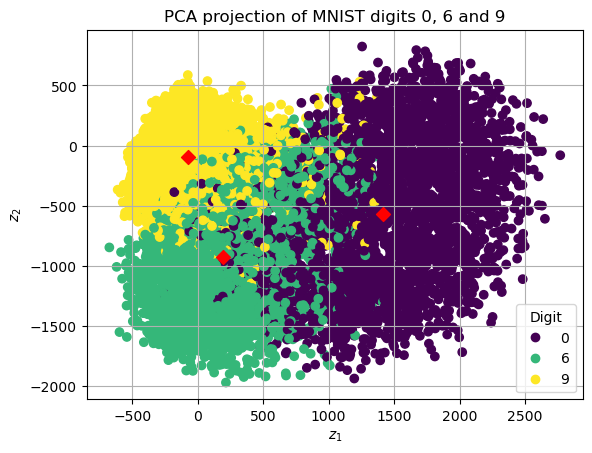

In [38]:
# Visualize the clusters
ax = plt.scatter(Z_train[0, :], Z_train[1, :], c=y_train)
plt.scatter(
    [c[0] for c in centroids],
    [c[1] for c in centroids],
    c="red",
    marker="D",
    s=50,
    label="Centroids",
)  # Plot centroids
plt.legend(*ax.legend_elements(), title="Digit")  # Add to the legend the list of digits
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA projection of MNIST digits 0, 6 and 9")
plt.grid()
plt.show()

In [39]:
# Computing for each cluster the average distance from its centroid
clusters = (Z1, Z2, Z3)

for i in range(3):
    Zc = (
        clusters[i] - centroids[i][:, np.newaxis]
    )  # Every column is (x - centroid), x data point
    distances = np.linalg.norm(
        Zc, axis=0
    )  # Array: entry i is the distance of data point x_i from the centroid
    avg_distance = np.mean(distances)  # Average distance

    print(f"Train set cluster {i+1}, average distance from centroid: {avg_distance}")

Train set cluster 1, average distance from centroid: 732.6757322971516
Train set cluster 2, average distance from centroid: 536.5288513934622
Train set cluster 3, average distance from centroid: 363.3413537558366


The average distance from the centroids measures how well PCA preserves the data structure in the reduced-dimensional space. Smaller distances indicate that the clusters are compact, suggesting that PCA effectively retains the intra-cluster structure.

In [40]:
Z_test = P @ X_test

filter_0 = y_test == 0
filter_6 = y_test == 6
filter_9 = y_test == 9

Z1_test = Z_test[:, filter_0]  # Cluster of 0
Z2_test = Z_test[:, filter_6]  # Cluster of 6
Z3_test = Z_test[:, filter_9]  # Cluster of 9
test_clusters = (Z1_test, Z2_test, Z3_test)

for i in range(3):
    Zc = test_clusters[i] - centroids[i][:, np.newaxis]
    distances = np.linalg.norm(Zc, axis=0)

    avg_distance = np.mean(distances)

    print(f"Test set cluster {i+1}, average distance from centroid: {avg_distance}")

Test set cluster 1, average distance from centroid: 723.0617440318599
Test set cluster 2, average distance from centroid: 535.3530308901692
Test set cluster 3, average distance from centroid: 360.08393459790904


The average distances from the training set centroids for test data are almost the same than for the test data. This suggests that the centroids are well-suited for the unseen data as well.

In [41]:
def predict(x, centroids, classes):
    min_d = np.inf  # Minimum distance from centroid
    pred_x = None  # Classification of x

    for i in range(len(centroids)):
        d = np.linalg.norm(x - centroids[i])
        if d < min_d:
            min_d = d
            pred_x = classes[i]

    return pred_x


idx = 0
x = Z_test[:, idx]
pred = predict(x, (c1, c2, c3), (0, 6, 9))
print(
    f"Observation of index {idx} assigned to class {pred}, the real class is {y_test[idx]}"
)

Observation of index 0 assigned to class 0, the real class is 0


In [42]:
# Predictions on test set
y_pred = np.zeros(len(y_test))  # Stores predictions
for i in range(len(y_test)):
    x = Z_test[:, i]
    y_pred[i] = predict(x, (c1, c2, c3), (0, 6, 9))

# Misclassification rate
misclassifications = 0
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        misclassifications += 1

mr = misclassifications / len(y_test)
print(f"Misclassification rate is {mr}")

Misclassification rate is 0.14686998394863562


### k=3 and digits 0, 6 and 9: Higher k

In [43]:
Z_train, P = pca(X_train, k=3)
Z_train.shape

(3, 9965)

In [44]:
filter_0 = y_train == 0
filter_6 = y_train == 6
filter_9 = y_train == 9

Z1 = Z_train[:, filter_0]  # Cluster of 0
Z2 = Z_train[:, filter_6]  # Cluster of 6
Z3 = Z_train[:, filter_9]  # Cluster of 9

print(Z1.shape, Z2.shape, Z3.shape)

(3, 3305) (3, 3309) (3, 3351)


In [45]:
# Computing for each cluster average distance from centroid
c1 = np.mean(Z1, axis=1)  # Centroid of cluster of 0
c2 = np.mean(Z2, axis=1)  # Centroid of cluster of 6
c3 = np.mean(Z3, axis=1)  # Centroid of cluster of 9
centroids = (c1, c2, c3)
clusters = (Z1, Z2, Z3)

for i in range(3):
    Zc = (
        clusters[i] - centroids[i][:, np.newaxis]
    )  # Every column is (x - centroid), x data point
    distances = np.linalg.norm(
        Zc, axis=0
    )  # Array: entry i is the distance of data point x_i from the centroid
    avg_distance = np.mean(distances)  # Average distance

    print(f"Train set cluster {i+1}, average distance from centroid: {avg_distance}")

Z_test = P @ X_test

filter_0 = y_test == 0
filter_6 = y_test == 6
filter_9 = y_test == 9

Z1_test = Z_test[:, filter_0]  # Cluster of 0
Z2_test = Z_test[:, filter_6]  # Cluster of 6
Z3_test = Z_test[:, filter_9]  # Cluster of 9
test_clusters = (Z1_test, Z2_test, Z3_test)

for i in range(3):
    Zc = (
        test_clusters[i] - centroids[i][:, np.newaxis]
    )  # Every column is (x - centroid), x data point
    distances = np.linalg.norm(
        Zc, axis=0
    )  # Array: entry i is the distance of data point x_i from the centroid
    avg_distance = np.mean(distances)  # Average distance

    print(f"Test cluster {i+1}, average distance from centroid: {avg_distance}")

Train set cluster 1, average distance from centroid: 853.3836466350484
Train set cluster 2, average distance from centroid: 706.2327643210948
Train set cluster 3, average distance from centroid: 485.88198797494204
Test cluster 1, average distance from centroid: 839.8692875852544
Test cluster 2, average distance from centroid: 692.6814327628128
Test cluster 3, average distance from centroid: 479.0012118906134


In [46]:
# Predictions on test set
y_pred = np.zeros(len(y_test))  # Stores predictions
for i in range(len(y_test)):
    x = Z_test[:, i]
    y_pred[i] = predict(x, (c1, c2, c3), (0, 6, 9))

# Misclassification rate
misclassifications = 0
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        misclassifications += 1

mr = misclassifications / len(y_test)
print(f"Misclassification rate is {mr}")

Misclassification rate is 0.06741573033707865


The average distances from the centroids are higher than for k=2, which is likely due to the higher-dimensional space. On the other hand, the misclassification rate is lower. I attribute this result to the reduced information loss in the PCA reduction, which then translated to more precise classifications.

### k=1 and digits 0, 6 and 9: Smaller k

In [47]:
Z_train, P = pca(X_train, k=1)

filter_0 = y_train == 0
filter_6 = y_train == 6
filter_9 = y_train == 9

Z1 = Z_train[:, filter_0]  # Cluster of 0
Z2 = Z_train[:, filter_6]  # Cluster of 6
Z3 = Z_train[:, filter_9]  # Cluster of 9

# Computing for each cluster average distance from centroid
c1 = np.mean(Z1, axis=1)  # Centroid of cluster of 0
c2 = np.mean(Z2, axis=1)  # Centroid of cluster of 6
c3 = np.mean(Z3, axis=1)  # Centroid of cluster of 9
centroids = (c1, c2, c3)
clusters = (Z1, Z2, Z3)

for i in range(3):
    Zc = (
        clusters[i] - centroids[i][:, np.newaxis]
    )  # Every column is (x - centroid), x data point
    distances = np.linalg.norm(
        Zc, axis=0
    )  # Array: entry i is the distance of data point x_i from the centroid
    avg_distance = np.mean(distances)  # Average distance

    print(f"Train set cluster {i+1}, average distance from centroid: {avg_distance}")

Z_test = P @ X_test

filter_0 = y_test == 0
filter_6 = y_test == 6
filter_9 = y_test == 9

Z1_test = Z_test[:, filter_0]  # Cluster of 0
Z2_test = Z_test[:, filter_6]  # Cluster of 6
Z3_test = Z_test[:, filter_9]  # Cluster of 9
test_clusters = (Z1_test, Z2_test, Z3_test)

for i in range(3):
    Zc = (
        test_clusters[i] - centroids[i][:, np.newaxis]
    )  # Every column is (x - centroid), x data point
    distances = np.linalg.norm(
        Zc, axis=0
    )  # Array: entry i is the distance of data point x_i from the centroid
    avg_distance = np.mean(distances)  # Average distance

    print(f"Test cluster {i+1}, average distance from centroid: {avg_distance}")

# Predictions on test set
y_pred = np.zeros(len(y_test))  # Stores predictions
for i in range(len(y_test)):
    x = Z_test[:, i]
    y_pred[i] = predict(x, (c1, c2, c3), (0, 6, 9))

# Misclassification rate
misclassifications = 0
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        misclassifications += 1

mr = misclassifications / len(y_test)
print(f"Misclassification rate is {mr}")

Train set cluster 1, average distance from centroid: 437.05200875531926
Train set cluster 2, average distance from centroid: 310.59291066611667
Train set cluster 3, average distance from centroid: 213.54836884636364
Test cluster 1, average distance from centroid: 433.0823756517778
Test cluster 2, average distance from centroid: 317.46323064971676
Test cluster 3, average distance from centroid: 212.15964770786888
Misclassification rate is 0.29574638844301765


The opposite of what happened for k=3 occurred for k=1. The distances are smaller compared to k=2 because of the lower-dimensional space, but the misclassification rate is higher because of the greater information loss.

### k=3 and digits 0, 5 and 6: Visually similar digits

In [48]:
df = pd.read_csv("./data/mnist_digits.csv")
# Preprocessing
data = np.array(df)

X = data[:, 1:]  # Skipping target column
X = X.T

Y = data[:, 0]  # target column

# Filtering: keeping entries corresponding to 0, 5 and 6
filter_0or5or6 = (Y == 0) | (Y == 5) | (Y == 6)

X_0or5or6 = X[:, filter_0or5or6]
Y_0or5or6 = Y[filter_0or5or6]

X_train, X_test, y_train, y_test = split_data(
    X_0or5or6, Y_0or5or6, train_size=0.8
)  # 80 : 20 train-test split

Z_train, P = pca(X_train, k=3)

filter_0 = y_train == 0
filter_5 = y_train == 5
filter_6 = y_train == 6

Z1 = Z_train[:, filter_0]  # Cluster of 0
Z2 = Z_train[:, filter_5]  # Cluster of 6
Z3 = Z_train[:, filter_6]  # Cluster of 9

# Computing for each cluster average distance from centroid
c1 = np.mean(Z1, axis=1)  # Centroid of cluster of 0
c2 = np.mean(Z2, axis=1)  # Centroid of cluster of 6
c3 = np.mean(Z3, axis=1)  # Centroid of cluster of 9

Z_test = P @ X_test

filter_0 = y_test == 0
filter_5 = y_test == 5
filter_6 = y_test == 6

Z1_test = Z_test[:, filter_0]  # Cluster of 0
Z2_test = Z_test[:, filter_5]  # Cluster of 6
Z3_test = Z_test[:, filter_6]  # Cluster of 9

# Predictions on test set
y_pred = np.zeros(len(y_test))  # Stores predictions
for i in range(len(y_test)):
    x = Z_test[:, i]
    y_pred[i] = predict(x, (c1, c2, c3), (0, 5, 6))

# Misclassification rate
misclassifications = 0
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        misclassifications += 1

mr = misclassifications / len(y_test)
print(f"Misclassification rate is {mr}")

Misclassification rate is 0.1276419394944053


The misclassification rate is higher than the one with digits 0,6 and 9; classification with PCA also suffers from visually similar digits.

### k=3 and digits 3, 4 and 8: Direct comparison with SVD based classifier

In [49]:
df = pd.read_csv("./data/mnist_digits.csv")
# Preprocessing
data = np.array(df)

X = data[:, 1:]  # Skipping target column
X = X.T

Y = data[:, 0]  # target column

# Filtering: keeping entries corresponding to 3, 4 and 8
filter_4or4or8 = (Y == 3) | (Y == 4) | (Y == 8)

X_3or4or8 = X[:, filter_3or4or8]
Y_3or4or8 = Y[filter_3or4or8]

X_train, X_test, y_train, y_test = split_data(
    X_3or4or8, Y_3or4or8, train_size=0.8
)  # 80 : 20 train-test split

Z_train, P = pca(X_train, k=3)

filter_3 = y_train == 3
filter_4 = y_train == 4
filter_8 = y_train == 8

Z1 = Z_train[:, filter_3]  # Cluster of 3
Z2 = Z_train[:, filter_4]  # Cluster of 4
Z3 = Z_train[:, filter_8]  # Cluster of 8

# Computing for each cluster average distance from centroid
c1 = np.mean(Z1, axis=1)  # Centroid of cluster of 3
c2 = np.mean(Z2, axis=1)  # Centroid of cluster of 4
c3 = np.mean(Z3, axis=1)  # Centroid of cluster of 8

Z_test = P @ X_test

filter_3 = y_test == 3
filter_4 = y_test == 4
filter_8 = y_test == 8

Z1_test = Z_test[:, filter_3]  # Cluster of 3
Z2_test = Z_test[:, filter_4]  # Cluster of 4
Z3_test = Z_test[:, filter_8]  # Cluster of 8

# Predictions on test set
y_pred = np.zeros(len(y_test))  # Stores predictions
for i in range(len(y_test)):
    x = Z_test[:, i]
    y_pred[i] = predict(x, (c1, c2, c3), (3, 4, 8))

# Misclassification rate
misclassifications = 0
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        misclassifications += 1

mr = misclassifications / len(y_test)
print(f"Misclassification rate is {mr}")

Misclassification rate is 0.16653322658126501


The PCA classification algorithm, with k = 3, has a lower misclassification rate than the one analyzed in the previous exercise, making it a better choice.